# CNN training on entire CNV by 3 classes

In [1]:
import os
import re
import sys
import copy
import random
import datetime
import timeit

import pandas as pd

import PIL
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import sklearn

from __future__ import print_function
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
from tensorflow import keras
import keras.preprocessing
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend

sys.path.append('/home/rt2776/cnv_espresso/src')
import function_dl as func_dl
import function as func

%load_ext autoreload
%autoreload 2

Tensorflow version 2.2.0
Tensorflow version 2.2.0


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
physical_devices

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

In [61]:
img_width, img_height = 224, 224
seed = 2021

## Importing data from scratch

### Import file path

In [5]:
## For rare CNVs
# path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/0-entire_cnv_file_list'
# true_del_file  = path + 'true_del_image_info.list'
# false_del_file = path + 'false_del_image_info.list'

# true_dup_file  = path + 'true_dup_image_info.list'
# false_dup_file = path + 'false_dup_image_info.list'

# true_del_df  = pd.read_csv(true_del_file,  header=0,sep='\t')
# false_del_df = pd.read_csv(false_del_file, header=0,sep='\t')

# true_dup_df  = pd.read_csv(true_dup_file,  header=0,sep='\t')
# false_dup_df = pd.read_csv(false_dup_file, header=0,sep='\t')

# true_del_images_path_list  = true_del_df['image_path']
# false_del_images_path_list = false_del_df['image_path']

# true_dup_images_path_list  = true_dup_df['image_path']
# false_dup_images_path_list = false_dup_df['image_path']

In [6]:
## For file with image path only:

# true_list = [each_file[0] for each_file in fileToList(true_file)]
# false_list = [each_file[0] for each_file in fileToList(false_file)]
# len(true_list), len(false_list)

In [ ]:
# true_del_images_path_list.shape, false_del_images_path_list.shape, true_dup_images_path_list.shape, false_dup_images_path_list.shape

### Loading images from list to numpy array

In [ ]:
# # entire cnv
# true_del_img_np = loadImgs(true_del_images_path_list, img_width, img_height)
# true_del_img_np.shape

# false_del_img_np = loadImgs(false_del_images_path_list, img_width, img_height)
# false_del_img_np.shape

# true_dup_img_np = loadImgs(true_dup_images_path_list, img_width, img_height)
# true_dup_img_np.shape

# false_dup_img_np = loadImgs(false_dup_images_path_list, img_width, img_height)
# false_dup_img_np.shape

In [46]:
image_demo = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/true_del/7_SP0000267_19_22653399_22756778_5tgs_6wins_True_DEL.png'
pdf_demo = '/home/rt2776/cnv_espresso/project6_rd_baf_image/images/images/79_1-01836_22_19028571_21388586_DEL.pdf'
image = tf.keras.preprocessing.image.load_img(image_demo)

In [56]:
#import pdf2image
images = pdf2image.convert_from_path(pdf_demo)
images[0]

In [64]:
images[0].size

(2000, 2000)

In [11]:

    cnv_np = np.zeros((len(cnv_list), img_width, img_height, 3))
    for index, each_cnv in enumerate(cnv_list):
        if index % 100 == 1:
            time_stamp = datetime.datetime.now()
            time_str   = time_stamp.strftime('%Y.%m.%d-%H:%M:%S')
            print("[%s] Processing %d %s..."%(time_str, index, each_cnv))
        try:
            cnv_img = resizeCropImg(each_cnv, img_width, img_height)
            cnv_np[index] = tf.keras.preprocessing.image.img_to_array(cnv_img)
        except:
            cnv_np[index] = None
    time_stamp = datetime.datetime.now()
    time_str   = time_stamp.strftime('%Y.%m.%d-%H:%M:%S')
    print("[%s] Done %d."%(time_str, index))
    return cnv_np

NameError: name 'true_del_images_path_list' is not defined

### Generate labels for entire CNVs

In [ ]:
# # Four classes
# true_del_label = [0 for i in range(0,len(true_del_img_np))]
# false_del_label = [1 for i in range(0,len(false_del_img_np))]

# true_dup_label = [3 for i in range(0,len(true_dup_img_np))]
# false_dup_label = [2 for i in range(0,len(false_dup_img_np))]

# print(true_del_label[0:5], false_del_label[0:5], true_dup_label[0:5], false_dup_label[0:5])
# print(len(true_del_label), len(false_del_label), len(true_dup_label), len(false_dup_label))

In [ ]:
# # Three classes
# true_del_label = [0 for i in range(0,len(true_del_img_np))]
# false_del_label = [1 for i in range(0,len(false_del_img_np))]

# true_dup_label = [2 for i in range(0,len(true_dup_img_np))]
# false_dup_label = [1 for i in range(0,len(false_dup_img_np))]

# print(true_del_label[0:5], false_del_label[0:5], true_dup_label[0:5], false_dup_label[0:5])
# print(len(true_del_label), len(false_del_label), len(true_dup_label), len(false_dup_label))

### Combine true & false data for entire CNVs

In [ ]:
# combined_cnv_info_df = true_del_df.append(false_del_df, ignore_index=True)
# combined_cnv_info_df = combined_cnv_info_df.append(true_dup_df, ignore_index=True)
# combined_cnv_info_df = combined_cnv_info_df.append(false_dup_df, ignore_index=True)

In [ ]:
# combined_img_np = np.vstack((true_del_img_np, false_del_img_np, true_dup_img_np, false_dup_img_np))

In [ ]:
# combined_label = true_del_label + false_del_label + true_dup_label + false_dup_label
# len(combined_label)

## Backup or restore data

- Backup

In [ ]:
## Backup

# backup_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/'
# os.makedirs(backup_path, exist_ok=True)

# project_name = 'rare_entire_del'
# combined_cnv_info_df.to_csv(backup_path+'rare_del_entire_cnv_info.csv')
# np.save(backup_path+'rare_del_entire_img', combined_img_np)
# np.save(backup_path+'rare_del_entire_label', combined_label)

# project_name = 'rare_entire_dup'
# combined_cnv_info_df.to_csv(backup_path+'rare_entire_dup_info.csv')
# np.save(backup_path+'rare_entire_dup_img', combined_img_np)
# np.save(backup_path+'rare_entire_dup_label', combined_label)

# project_name = 'rare_entire_cnv'
# combined_cnv_info_df.to_csv(backup_path+'rare_entire_cnv_info.csv')
# np.save(backup_path+'rare_entire_cnv_img', combined_img_np)
# np.save(backup_path+'rare_entire_cnv_label_'+str(len(np.unique(combined_label)))+'classes', combined_label)

- Restore

In [6]:
backup_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/'
## Restore for entire del or dup

# project_name = 'rare_entire_del'
# project_name = 'rare_entire_dup'
project_name = 'rare_entire_cnv'
nClasses = 3
if project_name == 'rare_entire_del' or project_name == 'rare_entire_dup' or project_name == 'rare_entire_cnv':
    combined_img = np.load(backup_path + project_name + '_img.npy')
    combined_label = np.load(backup_path+'rare_entire_cnv_label_'+str(nClasses)+'classes'+ '.npy')
    combined_cnv_info_df = pd.read_csv(backup_path+project_name+'_info.csv')

In [7]:
print("Project: '%s' dataset loaded."%project_name)
print("  -- Shape of image array: ", combined_img.shape)
print("  -- Shape of label      : ", combined_label.shape)
try:
    print("  -- Shape of CNV info   : ", combined_cnv_info_df.shape)
except:
    print("There is no CNV info data for split del or dup.")

Project: 'rare_entire_cnv' dataset loaded.
  -- Shape of image array:  (22008, 224, 224, 3)
  -- Shape of label      :  (22008,)
  -- Shape of CNV info   :  (22008, 22)


In [8]:
combined_cnv_info_df

Unnamed: 0  CHR  PRED_START   PRED_END TYPE     SAMPLE  CANOES_RT  \
0               0    6   144447210  144462866  DEL  SP0000267        1.0   
1               1   19    22653399   22756778  DEL  SP0000267        0.0   
2               2   20    49539569   49550189  DEL  SP0000285        0.0   
3               3   19    56189826   56193052  DEL  SP0000523        1.0   
4               4   10    27398293   27414250  DEL  SP0000551        1.0   
...           ...  ...         ...        ...  ...        ...        ...   
22003       22003    9    21166042   21239935  DUP  SP0151577        0.0   
22004       22004   15    51782720   51863010  DUP  SP0153750        0.0   
22005       22005    3   195739846  195749064  DUP  SP0154149        0.0   
22006       22006   19    17282056   17284266  DUP  SP0154150        0.0   
22007       22007   12   132604705  132606251  DUP  SP0154427        0.0   

       CLAMMS_RT  XHMM_RT  NUM_OVERLAPS_RT  ...  PRED_SIZE   MAP  NUM_TARGETS  \
0           1.00      1.0                3  ...      15656  1.00            9   
1           0.00      1.0                1  ...     103379  0.96            5   
2           1.00      1.0                2  ...      10620  1.00            4   
3           0.69      1.0                3  ...       3226  0.95            4   
4           1.00      0.0                2  ...      15957  1.00            4   
...          ...      ...              ...  ...        ...   ...          ...   
22003       1.00      0.0                1  ...      73893  0.95            7   
22004       1.00      0.0                1  ...      80290  1.00            5   
22005       0.00      1.0                1  ...       9218  0.99            3   
22006       0.00      1.0                1  ...       2210  1.00            5   
22007       0.00      1.0                1  ...       1546  1.00            3   

          SIZE_LABEL  LABEL_VAL   ref    batch Num_Carriers(inGivenCohort)  \
0        D)10KB-25KB          1  hg38   spark1                           1   
1      H)100KB-250KB          1  hg38   spark1                         128   
2        D)10KB-25KB          1  hg38   spark1                          15   
3          B)1KB-5KB          1  hg38   spark1                           1   
4        D)10KB-25KB          1  hg38   spark1                         107   
...              ...        ...   ...      ...                         ...   
22003    F)50KB-75KB          0  hg38  spark10                          26   
22004   G)75KB-100KB          0  hg38  spark10                           1   
22005     C)5KB-10KB          0  hg38  spark10                          80   
22006      B)1KB-5KB          0  hg38  spark10                           0   
22007      B)1KB-5KB          0  hg38  spark10                           0   

      Num_Targets_Wins                                         image_path  
0                    9  /home/rt2776/cnv_espresso/images_rare_3classes...  
1                    6  /home/rt2776/cnv_espresso/images_rare_3classes...  
2                    4  /home/rt2776/cnv_espresso/images_rare_3classes...  
3                    4  /home/rt2776/cnv_espresso/images_rare_3classes...  
4                    5  /home/rt2776/cnv_espresso/images_rare_3classes...  
...                ...                                                ...  
22003                7  /home/rt2776/cnv_espresso/images_rare_3classes...  
22004                5  /home/rt2776/cnv_espresso/images_rare_3classes...  
22005                3  /home/rt2776/cnv_espresso/images_rare_3classes...  
22006                5  /home/rt2776/cnv_espresso/images_rare_3classes...  
22007                3  /home/rt2776/cnv_espresso/images_rare_3classes...  

[22008 rows x 22 columns]

## Normalization

In [7]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = combined_img.shape[1:]
input_shape = (nRows, nCols, nDims)
print("The shape of input tensor:",input_shape)

The shape of input tensor: (224, 224, 3)


In [8]:
# Change to float datatype
combined_img = combined_img.astype('float32')

# Scale the data to lie between 0 to 1
combined_img /= 255

# Change the labels from integer to categorical data
combined_label_one_hot = to_categorical(combined_label)

In [22]:
combined_label_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [9]:
np.unique(combined_label)

array([0, 1, 2])

## Find the unique numbers from the train labels

In [10]:
classes = np.unique(combined_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("4 classes label: 0-True del; 1-False del; 2-False dup; 3-True dup")
print("3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup")

Total number of outputs :  3
Output classes :  [0 1 2]
4 classes label: 0-True del; 1-False del; 2-False dup; 3-True dup
3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup


In [11]:
#np.where(train_label==0)

In [12]:
item = random.randint(0,len(combined_label))
#item = 110 
print(combined_label[item])
func_dl.showImg(combined_img[item])
print(combined_img[item][100][0:10])

2
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## Train the deep nerual model by Hold-out validation
- Ref: https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
### Split dataset into training(80%) and testing(20%) dataset

In [13]:
project_name

'rare_entire_cnv'

In [14]:
## split image arrays
if project_name == 'rare_entire_cnv' or project_name == 'rare_entire_del' or project_name == 'rare_entire_dup':
    train_img, test_img, train_label, test_label, train_cnv_info_df, test_cnv_info_df = train_test_split(combined_img,
                                                                                                        combined_label_one_hot,
                                                                                                        combined_cnv_info_df,
                                                                                                        test_size=0.2,
                                                                                                        shuffle=True,
                                                                                                        random_state=seed)

    train_img, val_img, train_label, val_label, train_cnv_info_df, val_cnv_info_df = train_test_split(train_img,
                                                                                                      train_label,
                                                                                                      train_cnv_info_df,
                                                                                                      test_size=0.25,
                                                                                                      shuffle=True,
                                                                                                      random_state=seed) # 0.25*0.8=0.2

combined_img.shape, train_img.shape, val_img.shape, test_img.shape
combined_label_one_hot.shape, train_label.shape, val_label.shape, test_label.shape

((22008, 3), (13204, 3), (4402, 3), (4402, 3))

In [87]:
## optional step: output the training+validation data and test data for comparsion with CN-Learn and DECoNT

# train data
train_val_cnv_info_df = train_cnv_info_df.append(val_cnv_info_df,  ignore_index=True)
train_val_cnv_info_df.drop(train_val_cnv_info_df.columns[0], axis=1, inplace=True)
train_val_cnv_info_df.shape

comparison_path = '/home/rt2776/cnv_espresso/comparison_w_cnLearn/'
train_val_cnv_info_df.to_csv(comparison_path+'CNVEspresso_training_validation_data.txt', index=None, sep='\t')

# test data
test_cnv_info_df.drop(test_cnv_info_df.columns[0], axis=1, inplace=True)
test_cnv_info_df.shape
comparison_path = '/home/rt2776/cnv_espresso/comparison_w_cnLearn/'
test_cnv_info_df.to_csv(comparison_path+'CNVEspresso_test_data.txt', index=None, sep='\t')

/data/rt2776/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
i=random.randrange(len(train_img))
## if the the images are different, then it means it has been shuffled.
print("Label: 0-True del; 1-False del; 2-False dup; 3-True dup")
print("3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup")
func_dl.showImg(train_img[i]),train_label[i]#,train_cnv_info_df.iloc[i,:],train_cnv_info_df.iloc[i,20]
print(train_img[i][100][80:100])
print("One hot Label:",train_label[i])

Label: 0-True del; 1-False del; 2-False dup; 3-True dup
3 classes label: 0-True del; 1-False del; 1-False dup; 2-True dup
[[0.9764706  0.9764706  0.9764706 ]
 [0.9490196  0.9490196  0.9490196 ]
 [0.9882353  0.9882353  0.9882353 ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.99215686 0.99215686 0.99215686]
 [0.91764706 0.91764706 0.91764706]
 [0.89411765 0.89411765 0.89411765]
 [0.94509804 0.94509804 0.94509804]
 [0.92156863 0.92156863 0.92156863]
 [0.84313726 0.84313726 0.84313726]
 [0.8627451  0.8627451  0.8627451 ]
 [0.91764706 0.91764706 0.91764706]
 [0.92156863 0.92156863 0.92156863]
 [0.88235295 0.88235295 0.88235295]
 [0.87058824 0.87058824 0.87058824]
 [0.85882354 0.85882354 0.85882354]
 [0.8784314  0.8784314  0.8784314 ]
 [0.8980392  0.8980392  0.8980392 ]
 [0.8666667  0.8666667  0.8666667 ]]
One hot Label: [1. 0. 0.]


In [29]:
test_img.shape, test_label.shape, test_cnv_info_df.shape

((4402, 224, 224, 3), (4402, 3), (4402, 22))

In [30]:
np.min(test_cnv_info_df['NUM_TARGETS']), np.max(test_cnv_info_df['NUM_TARGETS'])

(1, 513)

In [31]:
test_cnv_info_df[test_cnv_info_df['NUM_TARGETS']<4]

Unnamed: 0  CHR  PRED_START   PRED_END TYPE     SAMPLE  CANOES_RT  \
8119         8119    6    27400370   27456921  DUP  SP0029239        1.0   
17649       17649   17    41836342   41837588  DUP  SP0040215        0.0   
6045         6045    4   129093069  129106647  DEL  SP0125643        1.0   
6958         6958   13    75537381   75537805  DUP  SP0013148        0.0   
13987       13987    5   178120177  178122001  DUP  SP0107699        0.0   
...           ...  ...         ...        ...  ...        ...        ...   
9370         9370   19    57813293   57819946  DUP  SP0044377        0.0   
1812         1812    9   113049361  113056688  DEL  SP0046136        1.0   
11197       11197    6    32641309   32642764  DUP  SP0066994        0.0   
6051         6051    3    48576248   48576557  DEL  SP0126058        0.0   
14608       14608   19    58453701   58456579  DUP  SP0117729        1.0   

       CLAMMS_RT  XHMM_RT  NUM_OVERLAPS_RT  ...  PRED_SIZE   MAP  NUM_TARGETS  \
8119        1.00      1.0                3  ...      56551  1.00            3   
17649       0.00      1.0                1  ...       1246  1.00            3   
6045        0.00      0.0                1  ...      13578  1.00            3   
6958        1.00      1.0                2  ...        424  1.00            3   
13987       1.00      1.0                2  ...       1824  1.00            3   
...          ...      ...              ...  ...        ...   ...          ...   
9370        0.81      1.0                2  ...       6653  0.97            3   
1812        1.00      1.0                3  ...       7327  1.00            3   
11197       0.00      1.0                1  ...       1455  0.94            3   
6051        0.00      1.0                1  ...        309  1.00            3   
14608       1.00      1.0                3  ...       2878  0.93            3   

        SIZE_LABEL  LABEL_VAL   ref   batch Num_Carriers(inGivenCohort)  \
8119   F)50KB-75KB          1  hg38  spark3                           1   
17649    B)1KB-5KB          0  hg38  spark3                          56   
6045   D)10KB-25KB          0  hg38  spark9                           0   
6958        A)<1KB          1  hg38  spark1                         136   
13987    B)1KB-5KB          1  hg38  spark9                           1   
...            ...        ...   ...     ...                         ...   
9370    C)5KB-10KB          1  hg38  spark4                         110   
1812    C)5KB-10KB          1  hg38  spark4                          34   
11197    B)1KB-5KB          1  hg38  spark6                           2   
6051        A)<1KB          0  hg38  spark9                           0   
14608    B)1KB-5KB          1  hg38  spark9                           2   

      Num_Targets_Wins                                         image_path  
8119                 6  /home/rt2776/cnv_espresso/images_rare_3classes...  
17649                3  /home/rt2776/cnv_espresso/images_rare_3classes...  
6045                 3  /home/rt2776/cnv_espresso/images_rare_3classes...  
6958                 3  /home/rt2776/cnv_espresso/images_rare_3classes...  
13987                3  /home/rt2776/cnv_espresso/images_rare_3classes...  
...                ...                                                ...  
9370                 3  /home/rt2776/cnv_espresso/images_rare_3classes...  
1812                 3  /home/rt2776/cnv_espresso/images_rare_3classes...  
11197                3  /home/rt2776/cnv_espresso/images_rare_3classes...  
6051                 3  /home/rt2776/cnv_espresso/images_rare_3classes...  
14608                4  /home/rt2776/cnv_espresso/images_rare_3classes...  

[303 rows x 22 columns]

## Visulize training and testing dataset
- In order to check the performance in different size categories (number of windows/targets), we need to check the distribution of CNVs in training and testing set.

In [38]:
sns.set(font="Arial black")

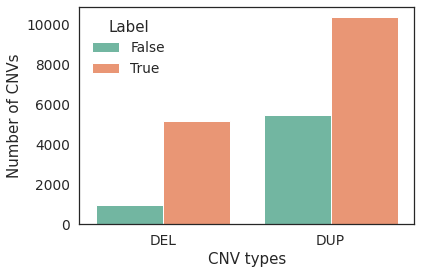

In [40]:
output_figure_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'figure3a_label_counts.pdf'

sns.set_theme(style="white", font_scale=1.25)
fig = sns.countplot(x="TYPE", data=combined_cnv_info_df.sort_values(by='TYPE'), hue="LABEL_VAL",palette="Set2")
plt.legend(title='Label', loc='upper left', labels=['False','True'], frameon=False)
fig.set(xlabel="CNV types", ylabel="Number of CNVs")

plt.savefig(output_figure_file,bbox_inches = 'tight')

In [41]:
## all the data
output_figure_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'figure3b_num_targets_wins.pdf'
sns.set_theme(style="white", font_scale=1.25)
fig = sns.displot(data=combined_cnv_info_df.sort_values(by='TYPE'),
                  bins=35,
                  x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True,
                  palette="Set2",legend=False)

#plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.set_axis_labels("Number of targets", "Number of CNVs", labelpad=15)
plt.legend(title='CNV type', loc='upper right',
           labels=['DUP','DEL'],frameon=False)

fig.savefig(output_figure_file)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

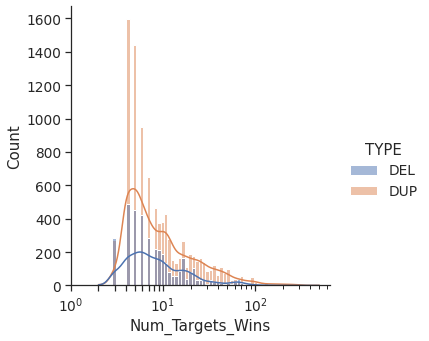

In [24]:
## training data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'train_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=train_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

In [57]:
## validation data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'validation_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=val_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

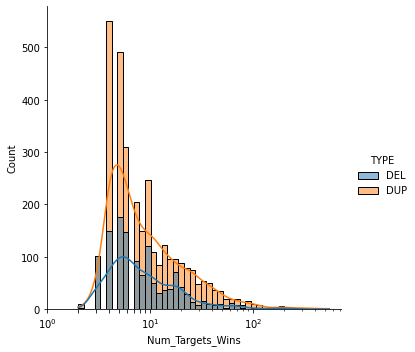

In [103]:
## testing data
output_figure_path = '/home/rt2776/cnv_espresso/images_rare_3classes/figures/'
output_figure_file = output_figure_path+'test_entire_cnv_num_targets_wins.png'

fig = sns.displot(data=test_cnv_info_df.sort_values(by='TYPE')
                  , x="Num_Targets_Wins", hue="TYPE", log_scale=True, kde=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10, 100]) #x轴的刻度值
fig.savefig(output_figure_file, facecolor='w', edgecolor='w', bbox_inches = 'tight',dpi=150)
## note: the bar is illustrated by the single type, not cumulated. For example, #win=4, del: 802 and dup:2729.

## Model comparision and selection

In [42]:
model_dir = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/'

### Sequential CNN model

In [43]:
model_name='CNN_model'
print("Model name: %s"%model_name)
model = func_dl.cnn_model(model_name, nClasses, input_shape)
model.summary()

Model name: CNN_model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None

In [148]:
print("Training by a common CNN model ...")
time_start = timeit.default_timer()

batch_size = 32
epochs = 20
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc]) ## easy to exhaust the memory by using "validation_split = 0.2"

time_stop = timeit.default_timer()
print('Time (minutes): ', (time_stop - time_start)/60) 
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)
print("Model_name:",model_name)
print("loss:",loss, "\naccuracy:",accuracy, "\nprecision:",precision, "\nrecall:",recall, "\nf1_score:",f1_score)

Training by a common CNN model ...
Epoch 1/20
413/413 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.6895 - f1_m: 0.6230 - precision_m: 0.6877 - recall_m: 0.5981
Epoch 00001: val_accuracy improved from -inf to 0.78532, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_CNN_model_3classes.h5
413/413 [==============================] - 74s 179ms/step - loss: 0.6792 - accuracy: 0.6895 - f1_m: 0.6230 - precision_m: 0.6877 - recall_m: 0.5981 - val_loss: 0.4738 - val_accuracy: 0.7853 - val_f1_m: 0.7785 - val_precision_m: 0.7965 - val_recall_m: 0.7620
Epoch 2/20
413/413 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8293 - f1_m: 0.8285 - precision_m: 0.8380 - recall_m: 0.8195
Epoch 00002: val_accuracy improved from 0.78532 to 0.86983, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_CNN_model_3classes.h5
413/413 [==============================] -

Epoch 16/20
413/413 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9141 - f1_m: 0.9142 - precision_m: 0.9156 - recall_m: 0.9129
Epoch 00016: val_accuracy did not improve from 0.91663
413/413 [==============================] - 79s 190ms/step - loss: 0.2249 - accuracy: 0.9141 - f1_m: 0.9142 - precision_m: 0.9156 - recall_m: 0.9129 - val_loss: 0.2476 - val_accuracy: 0.9109 - val_f1_m: 0.9110 - val_precision_m: 0.9125 - val_recall_m: 0.9095
Epoch 17/20
413/413 [==============================] - ETA: 0s - loss: 0.2185 - accuracy: 0.9175 - f1_m: 0.9171 - precision_m: 0.9182 - recall_m: 0.9159
Epoch 00017: val_accuracy did not improve from 0.91663
413/413 [==============================] - 80s 193ms/step - loss: 0.2185 - accuracy: 0.9175 - f1_m: 0.9171 - precision_m: 0.9182 - recall_m: 0.9159 - val_loss: 0.2368 - val_accuracy: 0.9132 - val_f1_m: 0.9133 - val_precision_m: 0.9146 - val_recall_m: 0.9120
Epoch 18/20
413/413 [==============================] - ETA: 0s - los

In [150]:
print("Model_name:",model_name)
print('Time (minutes): ', (time_stop - time_start)/60) 
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)
print("loss:",loss, "\naccuracy:",accuracy, "\nprecision:",precision, "\nrecall:",recall, "\nf1_score:",f1_score)

Model_name: CNN_model
Time (minutes):  26.601578006520867
138/138 [==============================] - 7s 52ms/step - loss: 0.2994 - accuracy: 0.9021 - f1_m: 0.9021 - precision_m: 0.9031 - recall_m: 0.9011
loss: 0.29943573474884033 
accuracy: 0.9020899534225464 
precision: 0.9031227231025696 
recall: 0.901091992855072 
f1_score: 0.9020910263061523


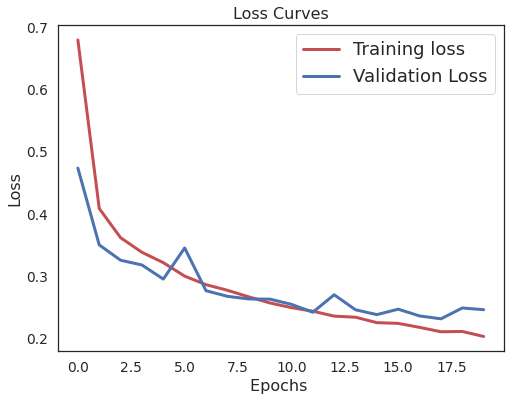

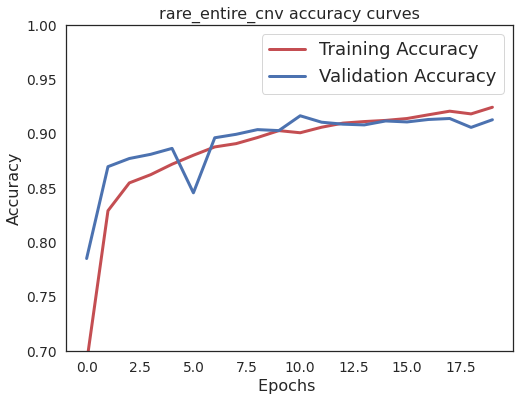

In [151]:
func_dl.draw_loss_accuracy_curves(history, project_name)

### MobileNet v1

In [46]:
model_name='MobileNet_v1'
print("Model name: %s"%model_name)
#model = func_dl.cnn_model(model_name, nClasses, input_shape)
model = func_dl.transfer_learning_model(model_name, nClasses, learning_rate = 1e-4, trainable=True)
model.summary()

Model name: MobileNet_v1
Model name: MobileNet_v1, nClasses: 3, Learning rate:0.000001, Trainable: True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [187]:
time_start = timeit.default_timer()

print("Training by %s model ..."%model_name)
batch_size = 32
epochs = 100

model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc]) ## easy to exhaust the memory by using "validation_split = 0.2"

time_stop = timeit.default_timer()
print('Time (minutes): ', (time_stop - time_start)/60) 
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)
print("Model_name:",model_name)
print("loss:",loss, "\naccuracy:",accuracy, "\nprecision:",precision, "\nrecall:",recall, "\nf1_score:",f1_score)

Training by MobileNet_v1 model ...
Epoch 1/100
413/413 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9261 - f1_m: 0.9256 - precision_m: 0.9297 - recall_m: 0.9217
Epoch 00001: val_accuracy improved from -inf to 0.90891, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes.h5
413/413 [==============================] - 72s 173ms/step - loss: 0.1944 - accuracy: 0.9261 - f1_m: 0.9256 - precision_m: 0.9297 - recall_m: 0.9217 - val_loss: 0.2426 - val_accuracy: 0.9089 - val_f1_m: 0.9077 - val_precision_m: 0.9116 - val_recall_m: 0.9040
Epoch 2/100
413/413 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9321 - f1_m: 0.9319 - precision_m: 0.9360 - recall_m: 0.9280
Epoch 00002: val_accuracy did not improve from 0.90891
413/413 [==============================] - 73s 177ms/step - loss: 0.1868 - accuracy: 0.9321 - f1_m: 0.9319 - precision_m: 0.9360 - recall_m: 0.9280 - val_loss: 0.24

413/413 [==============================] - ETA: 0s - loss: 0.0958 - accuracy: 0.9724 - f1_m: 0.9721 - precision_m: 0.9735 - recall_m: 0.9708
Epoch 00033: val_accuracy did not improve from 0.91390
413/413 [==============================] - 74s 179ms/step - loss: 0.0958 - accuracy: 0.9724 - f1_m: 0.9721 - precision_m: 0.9735 - recall_m: 0.9708 - val_loss: 0.2165 - val_accuracy: 0.9130 - val_f1_m: 0.9132 - val_precision_m: 0.9150 - val_recall_m: 0.9115
Epoch 34/100
413/413 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9729 - f1_m: 0.9729 - precision_m: 0.9741 - recall_m: 0.9718
Epoch 00034: val_accuracy did not improve from 0.91390
413/413 [==============================] - 73s 177ms/step - loss: 0.0963 - accuracy: 0.9729 - f1_m: 0.9729 - precision_m: 0.9741 - recall_m: 0.9718 - val_loss: 0.2163 - val_accuracy: 0.9130 - val_f1_m: 0.9131 - val_precision_m: 0.9148 - val_recall_m: 0.9115
Epoch 35/100
413/413 [==============================] - ETA: 0s - loss: 0.0920 

In [188]:
func_dl.draw_loss_accuracy_curves(history, project_name)

In [189]:
print("Model_name:",model_name)
print('Time (minutes): ', (time_stop - time_start)/60) 
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)
print("loss:",loss, "\naccuracy:",accuracy, "\nprecision:",precision, "\nrecall:",recall, "\nf1_score:",f1_score)

Model_name: MobileNet_v1
Time (minutes):  44.10692980373278
138/138 [==============================] - 5s 38ms/step - loss: 0.2403 - accuracy: 0.9085 - f1_m: 0.9082 - precision_m: 0.9097 - recall_m: 0.9068
loss: 0.24025090038776398 
accuracy: 0.908450722694397 
precision: 0.9096873998641968 
recall: 0.9068034887313843 
f1_score: 0.9082189798355103


#### Question: 
which model will be used for evaluating the test data?

Answer: the model will be chosen as the last training one. 
    but the model has been saved when it has the best performance.

In [171]:
model.evaluate(val_img, val_label)
# this result is exactly as the last training result (epoch 5)

138/138 [==============================] - 5s 39ms/step - loss: 0.2770 - accuracy: 0.9216 - f1_m: 0.9215 - precision_m: 0.9221 - recall_m: 0.9210


[0.27698877453804016,
 0.9216265082359314,
 0.9215442538261414,
 0.9220860004425049,
 0.9210194945335388]

In [174]:
model_saved_file = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes.h5'

custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}
model_saved = keras.models.load_model(model_saved_file, custom_objects=custom_objects)
model_saved.evaluate(val_img, val_label)

138/138 [==============================] - 5s 37ms/step - loss: 0.2051 - accuracy: 0.9230 - f1_m: 0.9234 - precision_m: 0.9244 - recall_m: 0.9223


[0.2050943821668625,
 0.922989547252655,
 0.9233516454696655,
 0.924415647983551,
 0.9223278760910034]

In [175]:
model_saved.evaluate(test_img, test_label)

138/138 [==============================] - 5s 37ms/step - loss: 0.2403 - accuracy: 0.9116 - f1_m: 0.9112 - precision_m: 0.9123 - recall_m: 0.9101


[0.24027350544929504,
 0.9116310477256775,
 0.9111626148223877,
 0.9122921824455261,
 0.9100744724273682]

### ResNet50

In [45]:
model_name='ResNet50'
print("Model name: %s"%model_name)
model = func_dl.transfer_learning_model(model_name, nClasses, learning_rate = 1e-4, trainable=True)
model.summary()

Model name: ResNet50
Model name: ResNet50, nClasses: 3, Learning rate:0.000100, Trainable: True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_________________________________________________________________


In [142]:
time_start = timeit.default_timer()

print("Training by %s model ..."%model_name)
batch_size = 32
epochs = 20

model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc]) ## easy to exhaust the memory by using "validation_split = 0.2"

time_stop = timeit.default_timer()


Training by ResNet50 model ...
Epoch 1/20
413/413 [==============================] - ETA: 0s - loss: 0.4546 - accuracy: 0.8428 - f1_m: 0.8392 - precision_m: 0.8531 - recall_m: 0.8274
Epoch 00001: val_accuracy improved from -inf to 0.88664, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_ResNet50_3classes.h5
413/413 [==============================] - 175s 425ms/step - loss: 0.4546 - accuracy: 0.8428 - f1_m: 0.8392 - precision_m: 0.8531 - recall_m: 0.8274 - val_loss: 0.2824 - val_accuracy: 0.8866 - val_f1_m: 0.8880 - val_precision_m: 0.8903 - val_recall_m: 0.8857
Epoch 2/20
413/413 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.8925 - f1_m: 0.8923 - precision_m: 0.8956 - recall_m: 0.8891
Epoch 00002: val_accuracy improved from 0.88664 to 0.90482, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_ResNet50_3classes.h5
413/413 [==============================] - 173s

In [143]:
print('Time (minutes): ', (time_stop - time_start)/60) 
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)
print("Model_name:",model_name)
print("loss:",loss, "\naccuracy:",accuracy, "\nf1_score:",f1_score, "\nprecision:",precision, "\nrecall:",recall)

Time (minutes):  23.477338566010197
138/138 [==============================] - 15s 106ms/step - loss: 0.2470 - accuracy: 0.9141 - f1_m: 0.9137 - precision_m: 0.9143 - recall_m: 0.9132
Model_name: ResNet50
loss: 0.24699455499649048 
accuracy: 0.914129912853241 
f1_score: 0.9137227535247803 
precision: 0.9142683148384094 
recall: 0.913194477558136


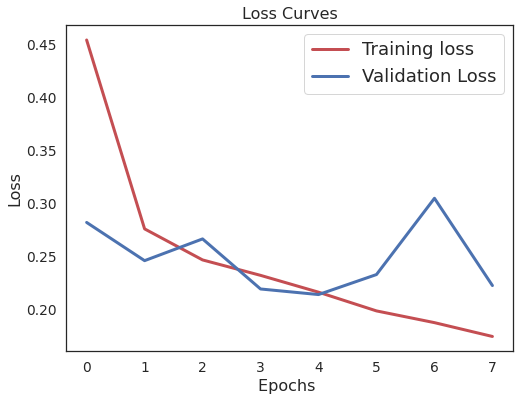

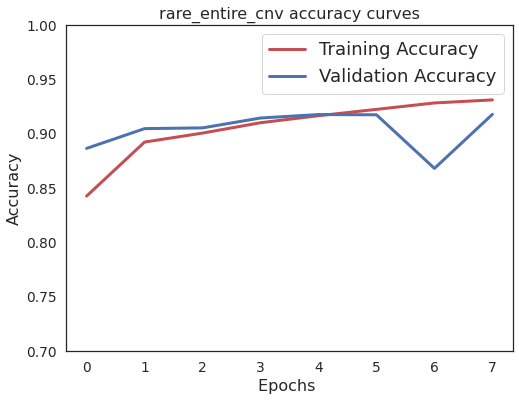

In [144]:
func_dl.draw_loss_accuracy_curves(history, project_name)

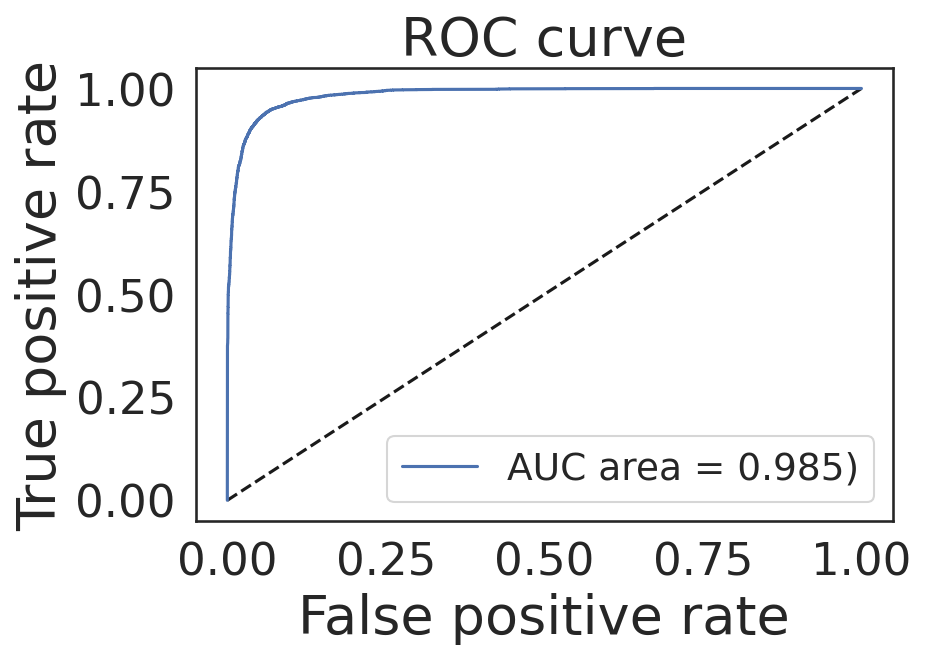

In [145]:
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


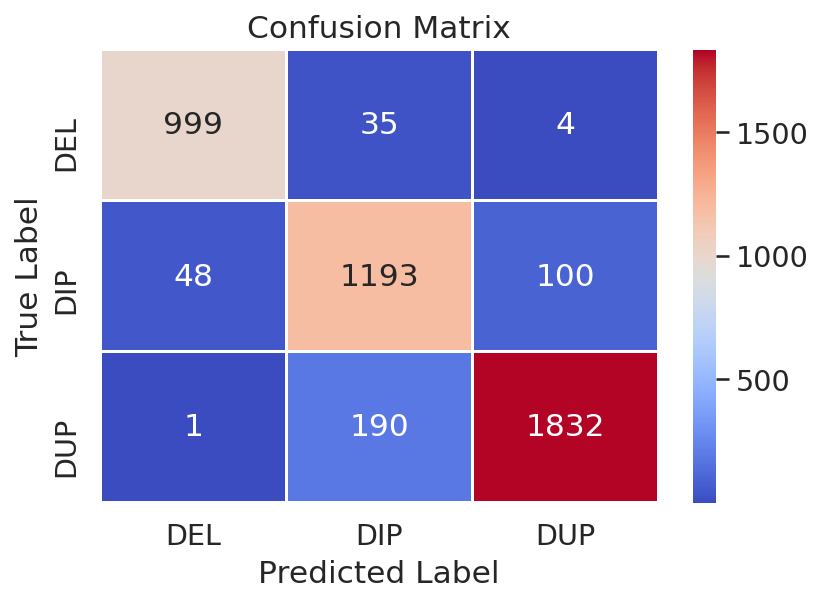


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1038
           1       0.84      0.89      0.86      1341
           2       0.95      0.91      0.93      2023

    accuracy                           0.91      4402
   macro avg       0.91      0.92      0.92      4402
weighted avg       0.92      0.91      0.91      4402



In [146]:
func_dl.confusion_matrix(model, test_img, test_label, nClasses)

## MobileNet v1. Transfer learning and fine-tuning

### MobileNet v1. use its architecture and set all the weights trainable

In [50]:
model_name='MobileNet_v1'
print("Model name: %s"%model_name)
model = func_dl.cnn_model(model_name, nClasses,input_shape)
model.summary()
func.showDateTime()

Model name: MobileNet_v1
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1000)              4253864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 1539      
Total params: 4,767,915
Trainable params: 4,746,027
Non-trainable params: 21,888
_________________________________________________________________
[2021.05.24-10:37:32]


In [51]:
model_name='MobileNet_v1_classic_tsf'
model = func_dl.transfer_learning_model("MobileNet_v1",nClasses,learning_rate= 1e-4,trainable=True)
model.summary()

Model name: MobileNet_v1, nClasses: 3, Learning rate:0.000010, Trainable: True
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [368]:
print("Training by MobileNet_v1 model ...")
batch_size = 100
epochs = 10
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc])
## easy to exhaust the memory by using "validation_split = 0.2"
print("\n")
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

Training by MobileNet_v1 model ...
Epoch 1/10
132/133 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9955 - f1_m: 0.9955 - precision_m: 0.9955 - recall_m: 0.9955
Epoch 00001: val_accuracy improved from -inf to 0.90527, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_classic_tsf_3classes.h5
133/133 [==============================] - 74s 554ms/step - loss: 0.0142 - accuracy: 0.9955 - f1_m: 0.9955 - precision_m: 0.9956 - recall_m: 0.9955 - val_loss: 0.6023 - val_accuracy: 0.9053 - val_f1_m: 0.8962 - val_precision_m: 0.8966 - val_recall_m: 0.8958
Epoch 2/10
132/133 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9939 - f1_m: 0.9939 - precision_m: 0.9939 - recall_m: 0.9939
Epoch 00002: val_accuracy improved from 0.90527 to 0.91913, saving model to /home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_classic_tsf_3classes.h5
133/133 [===

In [369]:
print("Model_name:",model_name)
print("loss:",loss, "\naccuracy:",accuracy, "\nf1_score:",f1_score, "\nprecision:",precision, "\nrecall:",recall)

Model_name: MobileNet_v1_classic_tsf
loss: 0.678913414478302 
accuracy: 0.9104952216148376 
f1_score: 0.9107285737991333 
precision: 0.9110403060913086 
recall: 0.9104267358779907


In [365]:
func_dl.draw_loss_accuracy_curves(history, project_name)

In [370]:
func_dl.confusion_matrix(model, test_img, test_label, nClasses)


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup



--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1038
           1       0.87      0.83      0.85      1341
           2       0.92      0.93      0.92      2023

    accuracy                           0.91      4402
   macro avg       0.91      0.91      0.91      4402
weighted avg       0.91      0.91      0.91      4402



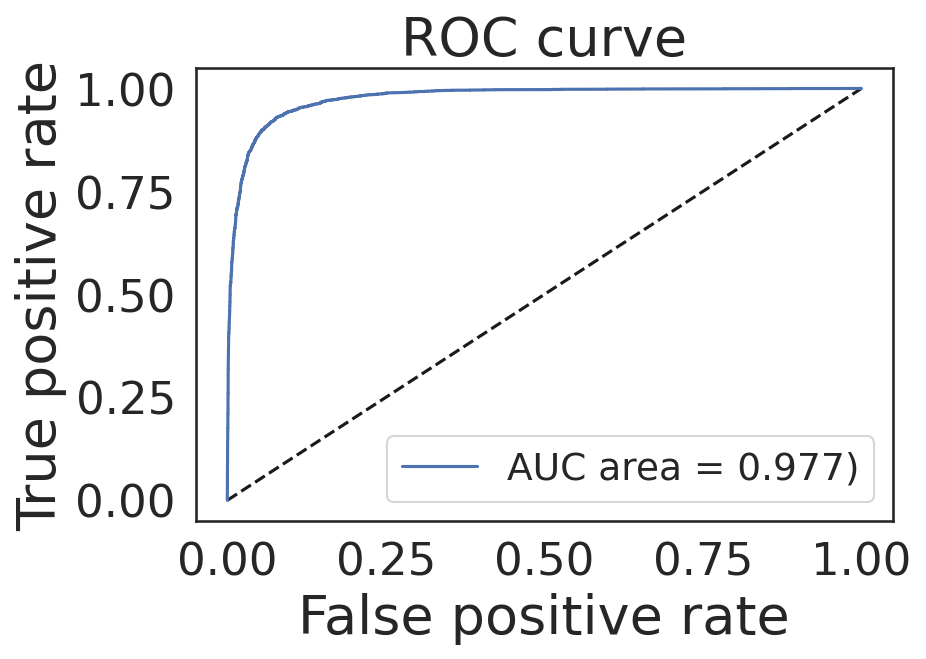

In [105]:
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)

In [88]:
# output model metrics
output_file = model_dir + project_name + "_" + model_name + "_model_metrics0524.txt"
func_dl.output_model_metrics(model_name, loss, accuracy, f1_score, precision, recall, output_file)
func.showDateTime()

Tensorflow version 2.2.0
[INFO]: File outputs to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_model_metrics0524.txt
[2021.05.24-14:24:46]


### MobileNet v1. transfer learning and fine tuning
- Firstly, we keep all the weights of base model frozen to train the fc layers.

In [52]:
model_name='MobileNet_v1_fine-tuning'
base_model = tf.keras.applications.MobileNet(
weights='imagenet',  # Load weights pre-trained model.
input_shape=(224, 224, 3),    #input_shape=(224, 224, 3),
include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3)) #keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(nClasses,activation='softmax')(x)      
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [53]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy', func_dl.f1_m, func_dl.precision_m, func_dl.recall_m])

In [54]:
print("Training by MobileNet_v1 model ...")
batch_size = 32
epochs = 20
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc])
## easy to exhaust the memory by using "validation_split = 0.2"
print("\n")
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

Training by MobileNet_v1 model ...
Epoch 1/20
413/413 [==============================] - ETA: 0s - loss: 0.3636 - accuracy: 0.8594 - f1_m: 0.8548 - precision_m: 0.8735 - recall_m: 0.8392
Epoch 00001: val_accuracy improved from -inf to 0.89414, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/413 [==============================] - 24s 58ms/step - loss: 0.3636 - accuracy: 0.8594 - f1_m: 0.8548 - precision_m: 0.8735 - recall_m: 0.8392 - val_loss: 0.2755 - val_accuracy: 0.8941 - val_f1_m: 0.8937 - val_precision_m: 0.8997 - val_recall_m: 0.8881
Epoch 2/20
412/413 [============================>.] - ETA: 0s - loss: 0.2627 - accuracy: 0.8975 - f1_m: 0.8971 - precision_m: 0.9016 - recall_m: 0.8928
Epoch 00002: val_accuracy improved from 0.89414 to 0.90232, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNe

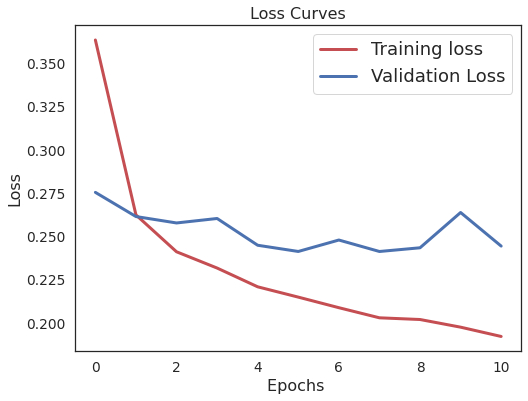

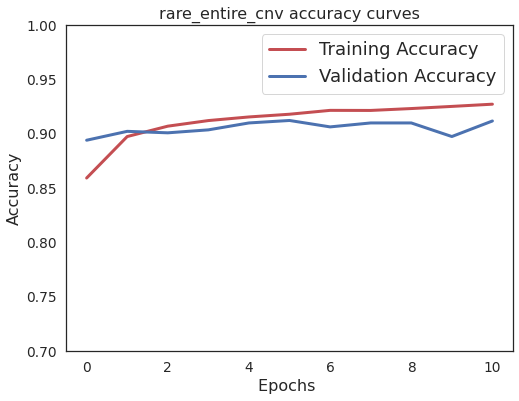


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


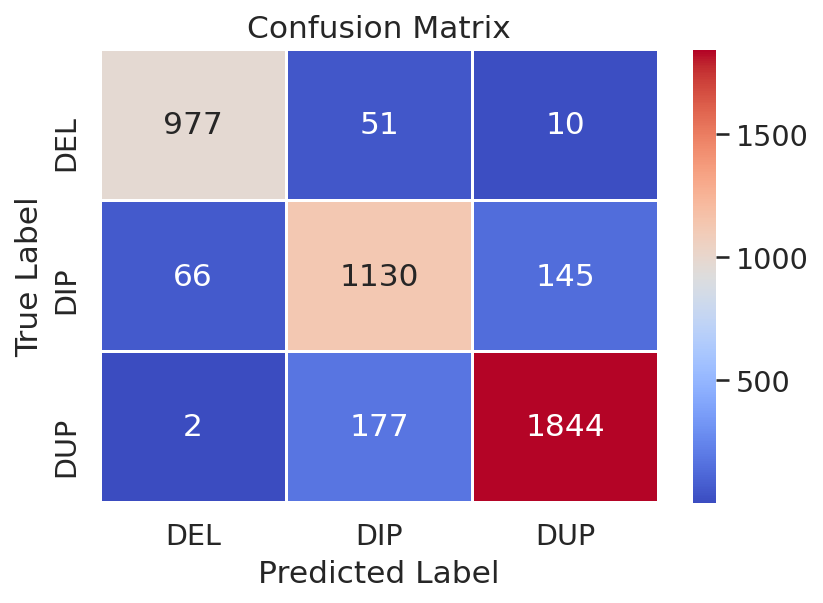


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1038
           1       0.83      0.84      0.84      1341
           2       0.92      0.91      0.92      2023

    accuracy                           0.90      4402
   macro avg       0.90      0.90      0.90      4402
weighted avg       0.90      0.90      0.90      4402



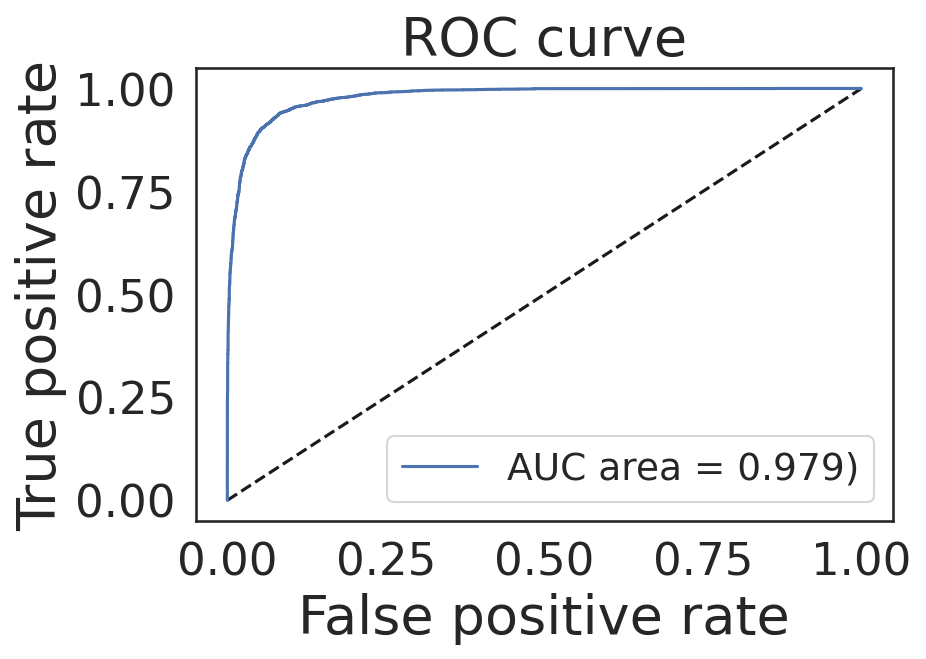

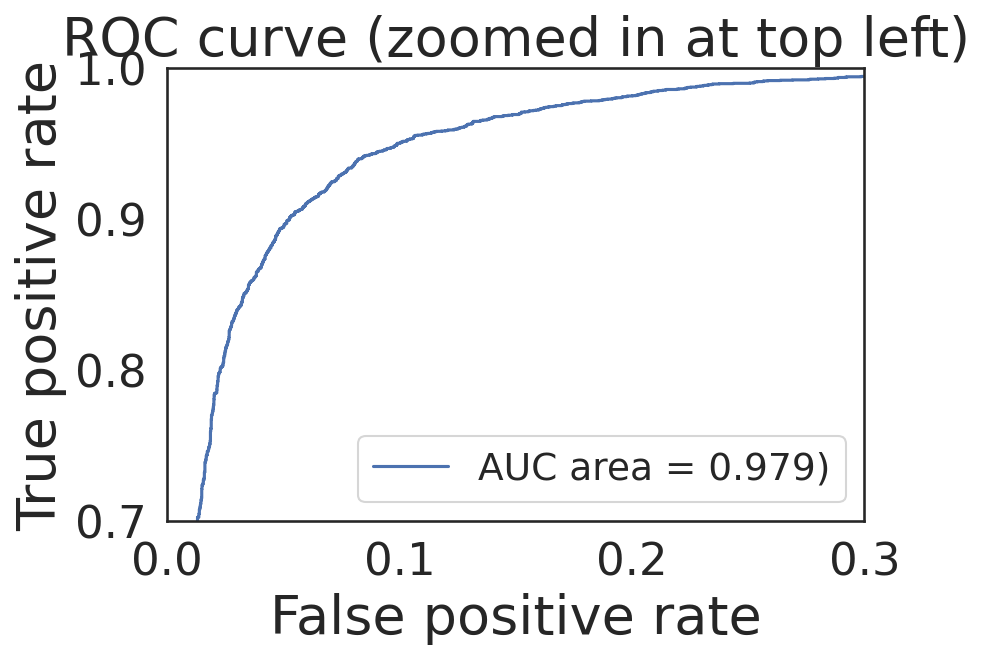

In [55]:
func_dl.draw_loss_accuracy_curves(history, project_name)
func_dl.confusion_matrix(model, test_img, test_label, nClasses)
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)

- Secondly, Once your model has converged on our train data, we unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.

In [58]:
print("Fine tuning by MobileNet_v1 model ...")
batch_size = 32
epochs = 10
model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses) + "classes.h5"

base_model.trainable=True
model.summary()

Fine tuning by MobileNet_v1 model ...
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [59]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy', metrics=['accuracy', func_dl.f1_m, func_dl.precision_m, func_dl.recall_m])

In [60]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(model_file,
                     monitor='val_accuracy',
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

history = model.fit(train_img, train_label,
                    batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_data=(val_img, val_label), 
                    callbacks=[es, mc])
## easy to exhaust the memory by using "validation_split = 0.2"
print("\n")
loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label)

Epoch 1/10
413/413 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9149 - f1_m: 0.9144 - precision_m: 0.9164 - recall_m: 0.9123
Epoch 00001: val_accuracy improved from -inf to 0.91072, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/413 [==============================] - 83s 200ms/step - loss: 0.2214 - accuracy: 0.9149 - f1_m: 0.9144 - precision_m: 0.9164 - recall_m: 0.9123 - val_loss: 0.2355 - val_accuracy: 0.9107 - val_f1_m: 0.9114 - val_precision_m: 0.9134 - val_recall_m: 0.9095
Epoch 2/10
413/413 [==============================] - ETA: 0s - loss: 0.1812 - accuracy: 0.9317 - f1_m: 0.9316 - precision_m: 0.9329 - recall_m: 0.9304
Epoch 00002: val_accuracy improved from 0.91072 to 0.91390, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5
413/4

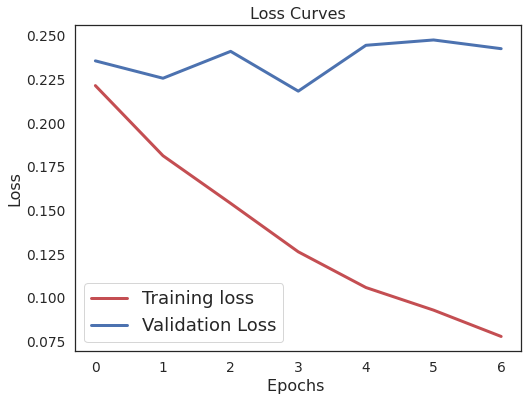


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup


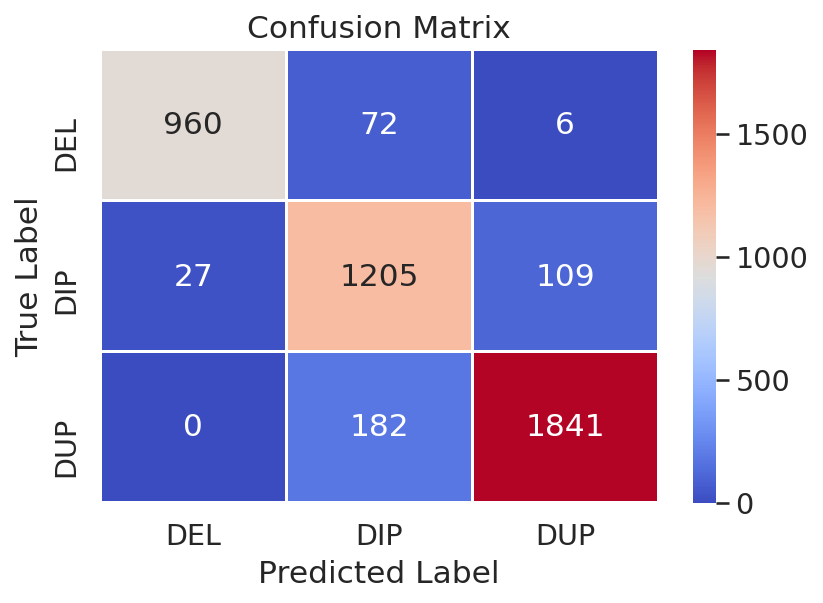


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1038
           1       0.83      0.90      0.86      1341
           2       0.94      0.91      0.93      2023

    accuracy                           0.91      4402
   macro avg       0.91      0.91      0.91      4402
weighted avg       0.91      0.91      0.91      4402



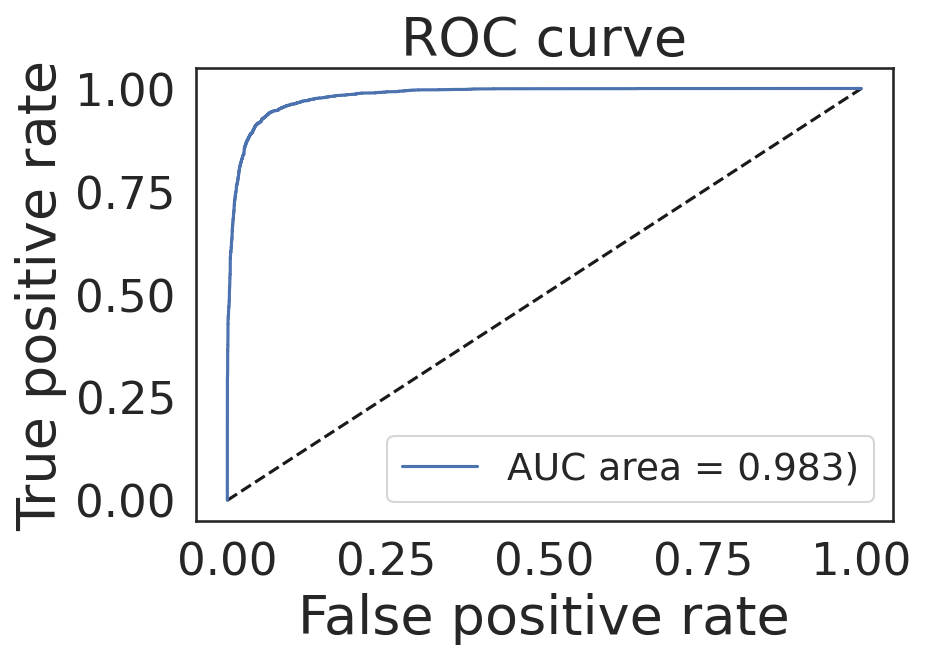

In [61]:
func_dl.draw_loss_accuracy_curves(history, project_name)
func_dl.confusion_matrix(model, test_img, test_label, nClasses)
fpr, tpr, thresholds, auc = func_dl.pred_roc_data(model, test_img, test_label)
func_dl.draw_single_roc_curve(tpr, fpr, auc)

In [ ]:
!cp /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5 \
    /home/rt2776/cnv_espresso/model/MobileNet_v1_fine_tuning_20210524.h5

## K-fold cross validation

In [63]:
model_dir = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/'
model_name='MobileNet_v1'

seed = 6666
num_folds = 5
# Define the K-fold Cross Validator
#kfold = KFold(n_splits=num_folds, shuffle=True)
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [65]:
VALIDATION_ACCURACY, VALIDATION_LOSS = [], []
tpr_list, tpr_interp_list, fpr_list, auc_list = [], [], [], []
mean_fpr = np.linspace(0, 1, 100)

nClasses = 3

# K-fold Cross Validation model evaluation

train_val_img, test_img, train_val_label, test_label = train_test_split(combined_img,
                                                                      combined_label,
                                                                      test_size=0.2,
                                                                      shuffle=True,
                                                                      random_state=seed)
test_label_one_hot = to_categorical(test_label)

fold_num = 0
for train_index, val_index in kfold.split(train_val_img, train_val_label):
    print('------------------------------------------------------------------------')
    func.showDateTime()
    print('Training for fold %d ...'%fold_num)
    print("num_index",len(train_index), len(val_index))
   
    train_img  = train_val_img[train_index]
    train_label_one_hot = to_categorical(train_val_label[train_index])
    
    val_img  = train_val_img[val_index]
    val_label_one_hot = to_categorical(train_val_label[val_index])
    
    print("Combined:", combined_img.shape, combined_label_one_hot.shape)
    print("Train:", train_img.shape, train_label_one_hot.shape)
    print("Validation:", val_img.shape, val_label_one_hot.shape)
    print("Test:", test_img.shape, test_label_one_hot.shape)
    
    # CREATE and COMPILE NEW MODEL
    model_name='MobileNet_v1'
    print("Model name: %s"%model_name)
    model = func_dl.cnn_model(model_name, nClasses, input_shape)
    
    model_file = model_dir + project_name + "_" + model_name + "_" + str(nClasses)+ "classes_fold" +str(fold_num)+"_0524.h5"
    
    # CREATE CALLBACKS
    batch_size = 32
    epochs = 50
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    checkpoint = ModelCheckpoint(model_file,
                         monitor='val_accuracy',
                         mode='max', 
                         verbose=1, 
                         save_best_only=True)
    callbacks_list = [checkpoint]
    
    # FIT THE MODEL
    print("Fit the model ...")
    history = model.fit(train_img, train_label_one_hot,
                        batch_size=batch_size, 
                        epochs=epochs, verbose=1, 
                        validation_data=(val_img, val_label_one_hot), 
                        callbacks=[es, checkpoint])
    ## easy to exhaust the memory by using "validation_split = 0.2"

    # LOAD BEST MODEL to evaluate the performance of the model
    print("Load weights...")
    model.load_weights(model_file)

    print("Evaluate ...")
    results = model.evaluate(test_img, test_label_one_hot)
    results = dict(zip(model.metrics_names,results))
    print(results)
    
    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])
    
    fpr_roc, tpr_roc, thresholds_roc, auc_roc = func_dl.pred_roc_data(model, test_img, test_label_one_hot)    

    interp_tpr = np.interp(mean_fpr, fpr_roc, tpr_roc)
    interp_tpr[0] = 0.0
    
    tpr_list.append(tpr_roc)
    tpr_interp_list.append(interp_tpr)
    fpr_list.append(fpr_roc)
    auc_list.append(auc_roc)
    
    tf.keras.backend.clear_session()
    fold_num += 1

------------------------------------------------------------------------
[2021.05.24-11:17:23]
Training for fold 0 ...
num_index 14084 3522
Combined: (22008, 224, 224, 3) (22008, 3)
Train: (14084, 224, 224, 3) (14084, 3)
Validation: (3522, 224, 224, 3) (3522, 3)
Test: (4402, 224, 224, 3) (4402, 3)
Model name: MobileNet_v1
Fit the model ...
Epoch 1/50
441/441 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.8318 - f1_m: 0.8053 - precision_m: 0.8351 - recall_m: 0.7880
Epoch 00001: val_accuracy improved from -inf to 0.86087, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold0_0524.h5
441/441 [==============================] - 81s 183ms/step - loss: 0.4706 - accuracy: 0.8318 - f1_m: 0.8053 - precision_m: 0.8351 - recall_m: 0.7880 - val_loss: 0.3785 - val_accuracy: 0.8609 - val_f1_m: 0.8589 - val_precision_m: 0.8641 - val_recall_m: 0.8539
Epoch 2/50
440/441 [==============

Epoch 3/50
440/441 [============================>.] - ETA: 0s - loss: 0.2954 - accuracy: 0.8900 - f1_m: 0.8899 - precision_m: 0.8912 - recall_m: 0.8886
Epoch 00003: val_accuracy improved from 0.88696 to 0.89037, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold2_0524.h5
441/441 [==============================] - 77s 174ms/step - loss: 0.2954 - accuracy: 0.8900 - f1_m: 0.8897 - precision_m: 0.8910 - recall_m: 0.8884 - val_loss: 0.3028 - val_accuracy: 0.8904 - val_f1_m: 0.8829 - val_precision_m: 0.8836 - val_recall_m: 0.8823
Epoch 4/50
440/441 [============================>.] - ETA: 0s - loss: 0.2792 - accuracy: 0.9007 - f1_m: 0.9003 - precision_m: 0.9016 - recall_m: 0.8989
Epoch 00004: val_accuracy improved from 0.89037 to 0.90315, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold2_0524.h5
441/

440/441 [============================>.] - ETA: 0s - loss: 0.3082 - accuracy: 0.8795 - f1_m: 0.8794 - precision_m: 0.8822 - recall_m: 0.8768
Epoch 00003: val_accuracy improved from 0.87191 to 0.89293, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold3_0524.h5
441/441 [==============================] - 78s 177ms/step - loss: 0.3086 - accuracy: 0.8794 - f1_m: 0.8792 - precision_m: 0.8820 - recall_m: 0.8766 - val_loss: 0.3331 - val_accuracy: 0.8929 - val_f1_m: 0.8938 - val_precision_m: 0.8941 - val_recall_m: 0.8936
Epoch 4/50
440/441 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.8933 - f1_m: 0.8932 - precision_m: 0.8943 - recall_m: 0.8922
Epoch 00004: val_accuracy did not improve from 0.89293
441/441 [==============================] - 78s 177ms/step - loss: 0.2802 - accuracy: 0.8932 - f1_m: 0.8930 - precision_m: 0.8941 - recall_m: 0.8920 - val_loss: 0.4906 - val_accu

Epoch 6/50
440/441 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9077 - f1_m: 0.9076 - precision_m: 0.9082 - recall_m: 0.9071
Epoch 00006: val_accuracy improved from 0.89548 to 0.90145, saving model to /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold4_0524.h5
441/441 [==============================] - 79s 180ms/step - loss: 0.2451 - accuracy: 0.9077 - f1_m: 0.9078 - precision_m: 0.9084 - recall_m: 0.9073 - val_loss: 0.2939 - val_accuracy: 0.9014 - val_f1_m: 0.9026 - val_precision_m: 0.9038 - val_recall_m: 0.9015
Epoch 7/50
440/441 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.9134 - f1_m: 0.9133 - precision_m: 0.9140 - recall_m: 0.9125
Epoch 00007: val_accuracy did not improve from 0.90145
441/441 [==============================] - 77s 175ms/step - loss: 0.2511 - accuracy: 0.9131 - f1_m: 0.9116 - precision_m: 0.9124 - recall_m: 0.9109 - val_loss: 0.5053

Number of folds: 5
ROC curve output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_roc_curve.pdf


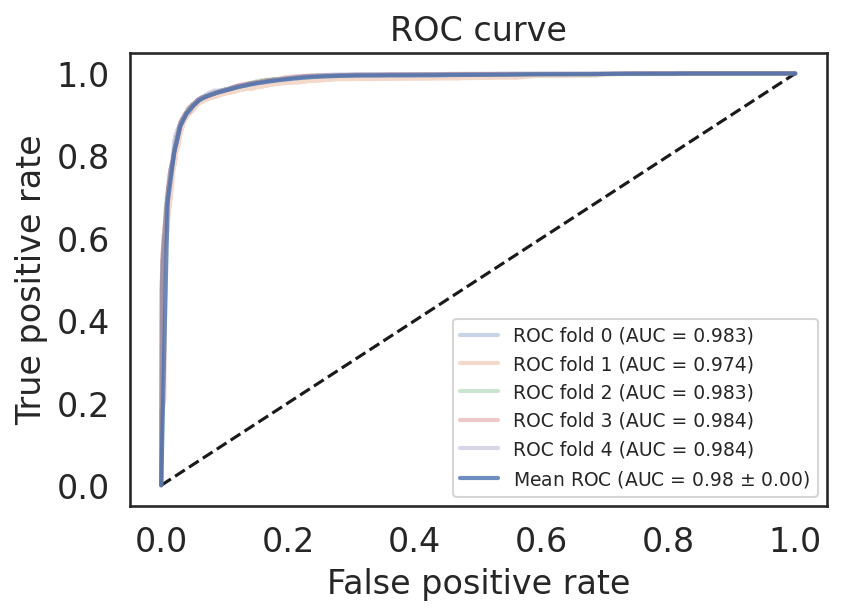

[2021.05.24-13:42:19]
Zoomed ROC curve output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5rare_entire_cnv_MobileNet_v1_roc_curve_zoom.pdf


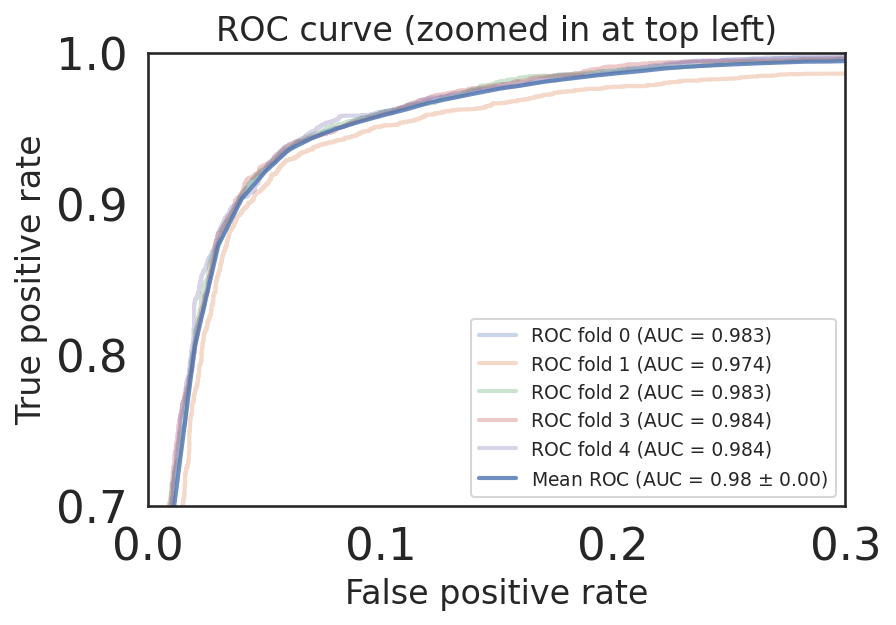

In [80]:
output_image_file = model_dir + project_name + "_" + model_name + "_roc_curve.pdf"
func_dl.draw_kfold_roc_curve(tpr_list, tpr_interp_list, fpr_list, auc_list, output_image_file)

#copy pdf to figure folder
! cp /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_roc_curve.pdf /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/figure4a_ROC_curve.pdf


--- Confusion matrix for test data ---

3 classes label: 0-True del; 1-True dip; 2-True dup
Figure has been output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/figure4b_confusion_matrix.pdf


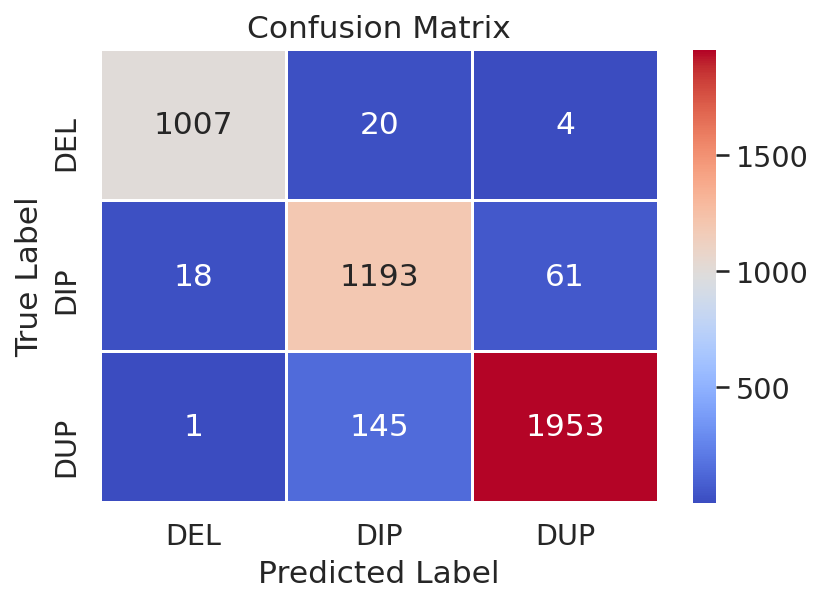


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1031
           1       0.88      0.94      0.91      1272
           2       0.97      0.93      0.95      2099

    accuracy                           0.94      4402
   macro avg       0.94      0.95      0.95      4402
weighted avg       0.95      0.94      0.94      4402



In [89]:
#model_file = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_3classes_fold1_0221.h5'
model_file = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/data_backup/model_h5/rare_entire_cnv_MobileNet_v1_fine-tuning_3classes.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}

output_img_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/'
output_img_file = output_img_path+'figure4b_confusion_matrix.pdf'

model = keras.models.load_model(model_file, custom_objects=custom_objects)
func_dl.confusion_matrix(model, test_img, test_label, nClasses=3, output_img_file=output_img_file)


## Result analysis
### Check the predict performance in different target numbers categories

In [90]:
min_win = 3
max_win = 4
selected_test_df, selected_test_img, selected_test_label = func_dl.fetch_df_by_wins(test_cnv_info_df, test_img, test_label, min_win, max_win)

There is/are 902 CNVs with number of targets/windows between 3 and 4.


In [92]:
print(selected_test_df.iloc[0,:])
print(selected_test_label[0])
func_dl.showImg(selected_test_img[0])

Unnamed: 0                                                                 21068
CHR                                                                            1
PRED_START                                                              46609654
PRED_END                                                                46615076
TYPE                                                                         DUP
SAMPLE                                                                 SP0121823
CANOES_RT                                                                      0
CLAMMS_RT                                                                      0
XHMM_RT                                                                        1
NUM_OVERLAPS_RT                                                                1
RD_PROP_RT                                                                  3.85
GC                                                                          0.54
PRED_SIZE                   

In [103]:
test_img.shape, test_label.shape, test_label_one_hot.shape, test_cnv_info_df.shape

((4402, 224, 224, 3), (4402,), (4402, 3), (4402, 22))

In [119]:
# are they same?
(to_categorical(test_label)==test_label_one_hot).all()

True

In [130]:
#model_path = '/home/rt2776/cnv_espresso/model/MobileNet_v1_fine_tuning_3classes.h5'
model_path = '/home/rt2776/cnv_espresso/model/MobileNet_v1_fine_tuning_20210524.h5'

custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}
model = keras.models.load_model(model_path, custom_objects=custom_objects)

loss, accuracy, f1_score, precision, recall = model.evaluate(test_img, test_label_one_hot)

138/138 [==============================] - 5s 36ms/step - loss: 0.1533 - accuracy: 0.9434 - f1_m: 0.9439 - precision_m: 0.9445 - recall_m: 0.9434


In [131]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

#please note that here is the number of WINDOWS not Target.
for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label_one_hot,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)

Processing num_windows: 2-2 ...
There is/are 11 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 202 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 700 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 667 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 457 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 296 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 215 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 188 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 179 CNVs with number of targets/windows between 10 and 10.


In [132]:
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label_one_hot,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label_one_hot,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label_one_hot,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label_one_hot,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_cnv_info_df, test_img, test_label_one_hot,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

Processing num_windows: 11-15 ...
There is/are 515 CNVs with number of targets/windows between 11 and 15.
Processing num_windows: 16-20 ...
There is/are 305 CNVs with number of targets/windows between 16 and 20.
Processing num_windows: 21-50 ...
There is/are 505 CNVs with number of targets/windows between 21 and 50.
Processing num_windows: 51-100 ...
There is/are 112 CNVs with number of targets/windows between 51 and 100.
Processing num_windows: 101-600 ...
There is/are 50 CNVs with number of targets/windows between 101 and 600.


ROC curve output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/figure5_roc_w_different_tgs.pdf


Zoomed ROC curve output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/figure5_roc_w_different_tgs_zoom.pdf


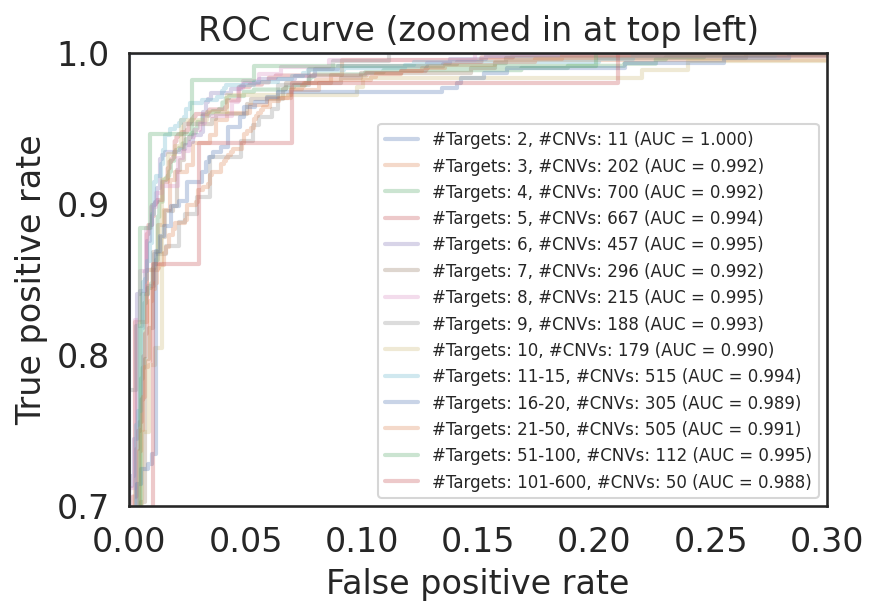

In [133]:
output_img_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/'
output_img_file = output_img_path+'figure5_roc_w_different_tgs.pdf'
func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=output_img_file)

###  Check the prediction performace by del and dup seperately

In [135]:
test_cnv_info_df = test_cnv_info_df.reset_index()

In [143]:
(to_categorical(test_label)==test_label_one_hot).all()

True

In [144]:
test_del_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DEL'].index
test_del_cnv_info_df = test_cnv_info_df.iloc[test_del_index]
test_del_img = test_img[test_del_index]
test_del_label = test_label_one_hot[test_del_index]

In [145]:
test_dup_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DUP'].index
test_dup_cnv_info_df = test_cnv_info_df.iloc[test_dup_index]
test_dup_img = test_img[test_dup_index]
test_dup_label = test_label_one_hot[test_dup_index]

In [146]:
test_dup_cnv_info_df.shape, test_del_cnv_info_df.shape

((3155, 23), (1247, 23))

- Deletion

Tensorflow version 2.2.0
Processing num_windows: 2-2 ...
There is/are 2 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 149 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 176 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 148 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 92 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 65 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 61 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 60 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 141 CNVs wit

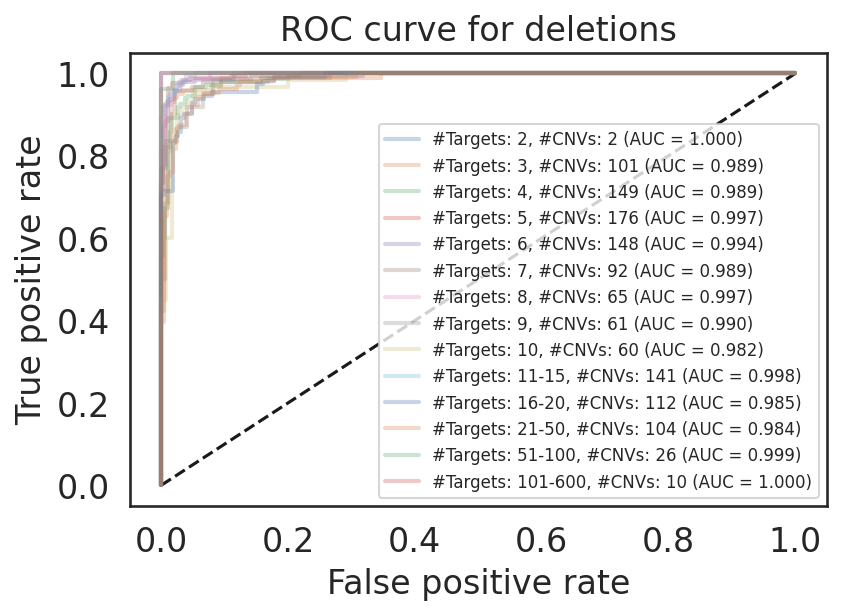

Zoomed ROC curve output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/supplementary_figure1a_roc_DEL_w_different_tgs_zoom.pdf


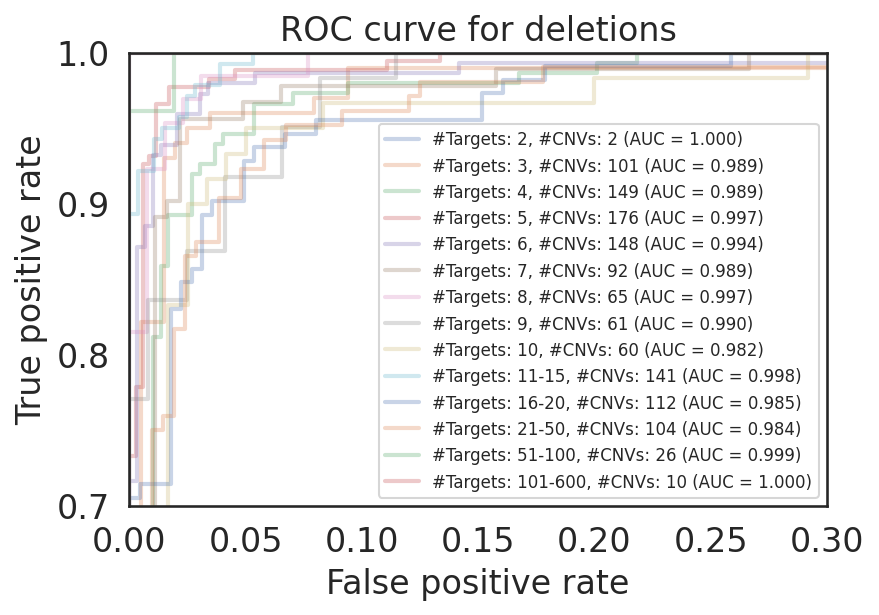

In [155]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

output_img_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/'
output_img_file = output_figure_path+'supplementary_figure1a_roc_DEL_w_different_tgs.pdf'
title_content = 'ROC curve for deletions'
func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, title_content = title_content, output_image_file=output_img_file)

- Duplication

Processing num_windows: 2-2 ...
There is/are 9 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 551 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 491 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 309 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 204 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 150 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 127 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 119 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 374 CNVs with number of targets/w

Zoomed ROC curve output plot to: /home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/supplementary_figure1b_roc_DUP_w_different_tgs_zoom.pdf


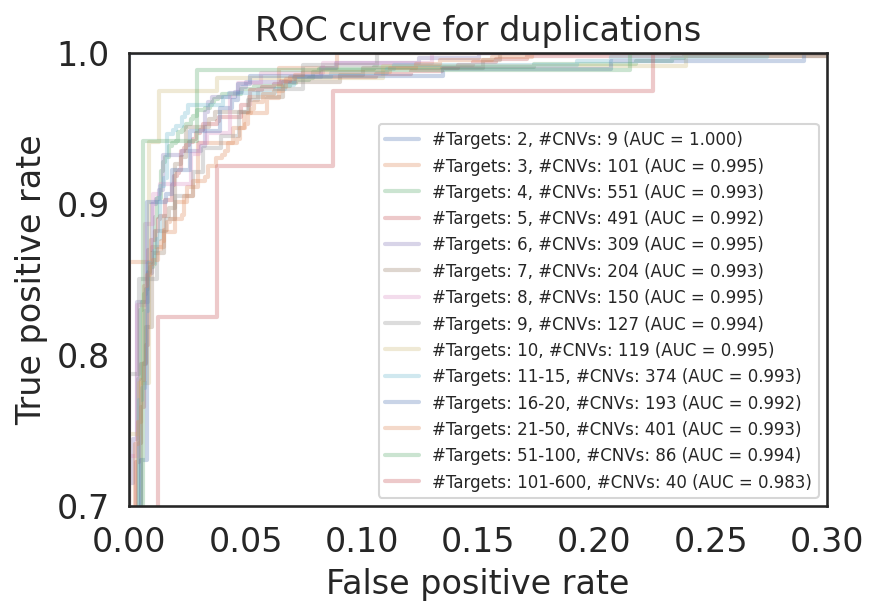

In [157]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

output_img_path = '/home/rt2776/cnv_espresso/project0_train_model/images_rare_3classes/figures/'
output_img_file = output_figure_path+'supplementary_figure1b_roc_DUP_w_different_tgs.pdf'
title_content = 'ROC curve for duplications'
func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, title_content = title_content, output_image_file=output_img_file)

### Predict the same test data by split CNV trained model

In [18]:
split_model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_split_cnv_3classes_MobileNet_v1_3classes_fold3.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}
split_model = keras.models.load_model(split_model_path, custom_objects=custom_objects)

In [19]:
split_model.evaluate(test_img, test_label)

138/138 [==============================] - 5s 40ms/step - loss: 0.4433 - accuracy: 0.7924 - f1_m: 0.7927 - precision_m: 0.7941 - recall_m: 0.7913


[0.44326913356781006,
 0.7923671007156372,
 0.7926908731460571,
 0.7941120266914368,
 0.7913143634796143]

In [20]:
test_cnv_info_df.shape, test_img.shape, test_label.shape

((4402, 22), (4402, 224, 224, 3), (4402, 3))

Processing num_windows: 2-2 ...
There is/are 11 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 202 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 700 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 667 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 457 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 296 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 215 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 188 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 179 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 515 CNVs with number of targets/

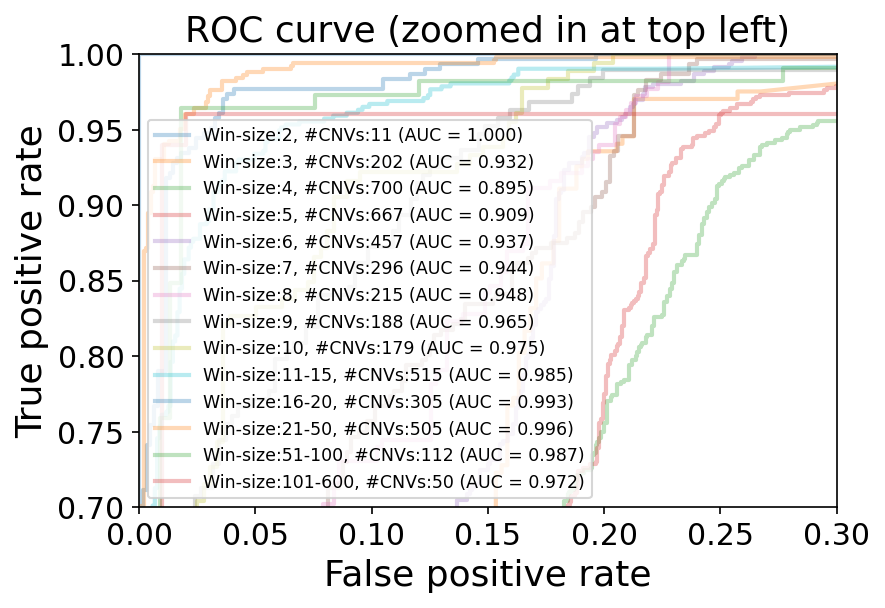

In [21]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(split_model, test_cnv_info_df, test_img, test_label,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

- **Deletion and duplication split models**

In [22]:
test_cnv_info_df.shape, test_img.shape, test_label.shape

((4402, 22), (4402, 224, 224, 3), (4402, 3))

In [23]:
test_cnv_info_df = test_cnv_info_df.reset_index(drop=True)

In [24]:
test_del_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DEL'].index
test_del_cnv_info_df = test_cnv_info_df.iloc[test_del_index]
test_del_img = test_img[test_del_index]
test_del_label = test_label[test_del_index]

test_del_cnv_info_df.shape, test_del_img.shape, test_del_label.shape 

((1247, 22), (1247, 224, 224, 3), (1247, 3))

In [25]:
test_dup_index = test_cnv_info_df[test_cnv_info_df["TYPE"]=='DUP'].index
test_dup_cnv_info_df = test_cnv_info_df.iloc[test_dup_index]
test_dup_img = test_img[test_dup_index]
test_dup_label = test_label[test_dup_index]

test_dup_cnv_info_df.shape, test_dup_img.shape, test_dup_label.shape 

((3155, 22), (3155, 224, 224, 3), (3155, 3))

In [80]:
## Transfer the label from 3 classes to 2 classes.

test_del_list, test_dup_list = [], []
for reader in test_del_label:
    if np.array_equal(reader, [0,1,0]): # when label = 1 in three classes as false del
        test_del_list.append([1,0])     # then transfer to 0 in two classes as false del
    elif np.array_equal(reader, [1,0,0]): # when label = 0 in three classes as true del
        test_del_list.append([0,1])       # then transfer to 1 in two classes as true del
test_del_label_one_hot = np.array(test_del_list)

for reader in test_dup_label:
    if np.array_equal(reader, [0,0,1]): #label=2
        test_dup_list.append([0,1])     # label to 1, true
    elif np.array_equal(reader, [0,1,0]): # when label=1
        test_dup_list.append([1,0])       # transfer to 0, false
test_dup_label_one_hot = np.array(test_dup_list)

In [81]:
test_dup_label.shape

(3155, 3)

In [82]:
test_del_label_one_hot.shape, test_dup_label_one_hot.shape

((1247, 2), (3155, 2))

In [28]:
## Deletion
split_del_model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_split_del_2classes_MobileNet_v1_fine-tuning_2classes.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}


model = keras.models.load_model(split_del_model_path, custom_objects=custom_objects)
loss, accuracy, f1_score, precision, recall = model.evaluate(test_del_img, test_del_label_one_hot)

39/39 [==============================] - 1s 36ms/step - loss: 0.3869 - accuracy: 0.8709 - f1_m: 0.8707 - precision_m: 0.8707 - recall_m: 0.8707


Tensorflow version 2.2.0
Processing num_windows: 2-2 ...
There is/are 2 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 149 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 176 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 148 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 92 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 65 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 61 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 60 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 141 CNVs wit

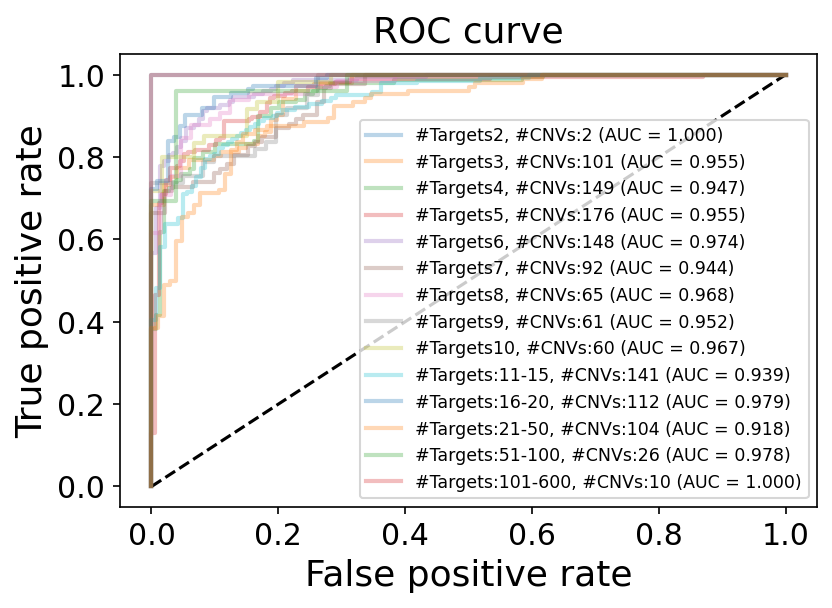

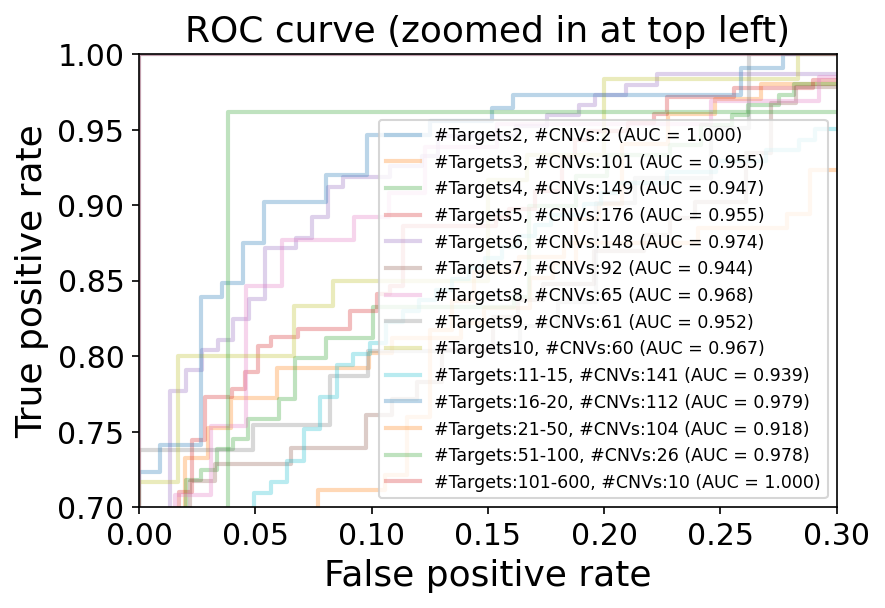

In [31]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_del_cnv_info_df, test_del_img, test_del_label_one_hot,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

In [83]:
## Duplication

split_dup_model_path = '/home/rt2776/cnv_espresso/images_rare_3classes/data_backup/model_h5/rare_split_dup_2classes_MobileNet_v1_fine-tuning_2classes.h5'
custom_objects = {"f1_m":func_dl.f1_m, "precision_m":func_dl.precision_m, "recall_m":func_dl.recall_m}


model = keras.models.load_model(split_dup_model_path, custom_objects=custom_objects)
loss, accuracy, f1_score, precision, recall = model.evaluate(test_dup_img, test_dup_label_one_hot)

99/99 [==============================] - 3s 32ms/step - loss: 0.3778 - accuracy: 0.8307 - f1_m: 0.8312 - precision_m: 0.8312 - recall_m: 0.8312


Processing num_windows: 2-2 ...
There is/are 9 CNVs with number of targets/windows between 2 and 2.
Processing num_windows: 3-3 ...
There is/are 101 CNVs with number of targets/windows between 3 and 3.
Processing num_windows: 4-4 ...
There is/are 551 CNVs with number of targets/windows between 4 and 4.
Processing num_windows: 5-5 ...
There is/are 491 CNVs with number of targets/windows between 5 and 5.
Processing num_windows: 6-6 ...
There is/are 309 CNVs with number of targets/windows between 6 and 6.
Processing num_windows: 7-7 ...
There is/are 204 CNVs with number of targets/windows between 7 and 7.
Processing num_windows: 8-8 ...
There is/are 150 CNVs with number of targets/windows between 8 and 8.
Processing num_windows: 9-9 ...
There is/are 127 CNVs with number of targets/windows between 9 and 9.
Processing num_windows: 10-10 ...
There is/are 119 CNVs with number of targets/windows between 10 and 10.
Processing num_windows: 11-15 ...
There is/are 374 CNVs with number of targets/w

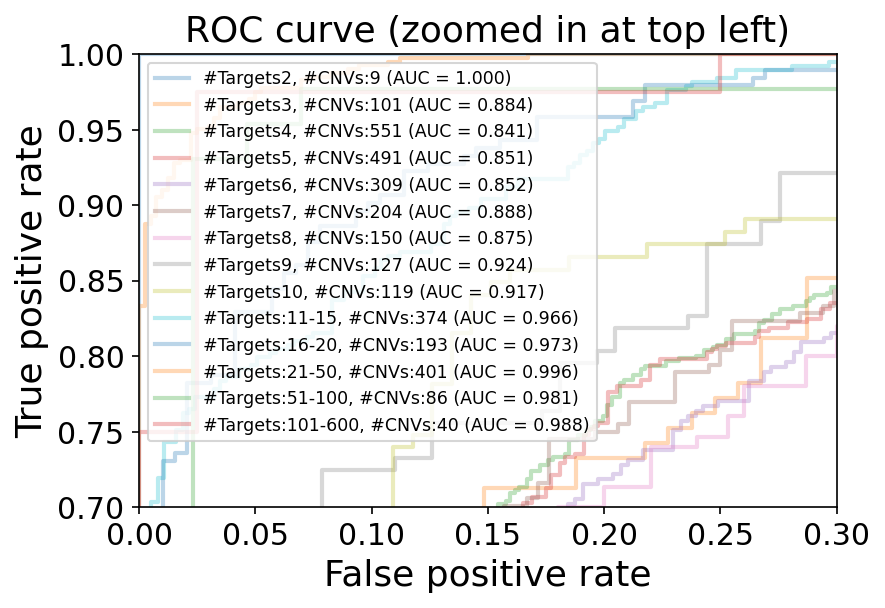

In [84]:
fpr_list, tpr_list, auc_list, info_list = [],[],[],[]

for win_num in range(2,11):
    min_win = win_num
    max_win = win_num
    fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win, max_win)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)
    info_list.append(roc_info)
    
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=11, max_win=15)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=16, max_win=20)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=21, max_win=50)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=51, max_win=100)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)
test_dup_cnv_info_df
fpr, tpr, auc, roc_info = func_dl.fetch_roc_info_by_num_win(model, test_dup_cnv_info_df, test_dup_img, test_dup_label_one_hot,
                                                          min_win=101, max_win=600)
fpr_list.append(fpr)
tpr_list.append(tpr)
auc_list.append(auc)
info_list.append(roc_info)

func_dl.draw_multiple_roc_curve(tpr_list, fpr_list, auc_list, info_list, output_image_file=None)

### Performance on PCGC experimental results 
- move to /home/rt2776/cnv_espresso/src_manuscript/prediction.ipynb

## Reference:
- Load image: https://keras.io/api/preprocessing/image/#load_img-function
- Model example: https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
- Transfer learning and toy demo: https://zhuanlan.zhihu.com/p/51889181
- Transfer learning and fine tune: 
    - 讲解：https://zhuanlan.zhihu.com/p/26693647
    - 官方教程：https://www.geek-book.com/src/docs/keras/keras/keras.io/guides/transfer_learning/index.html
- K-fold validation: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538
- ROC curve: https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a
- F1 score: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model